# IMDb Analysis

#### In this assignment, you will work on movie data from IMDB.
- The data includes movies and ratings from the IMDB website
- Data File(s): imdb.xlsx

#### Data file contains 3 sheets:
- “imdb”: contains records of movies and ratings scraped from IMDB website
- “countries”: contains the country (of origin) names
- “directors”: contains the director names

# Load, Inspect, & Query Movie & Ratings Data

In [19]:
""" Q1: 
Load and read the 'imdb.xlsx' file. Read the 'imdb' sheet into a DataFrame, df.
"""

import pandas as pd

# read the individual sheets in Excel file

xls = pd.ExcelFile('imdb.xlsx')

# read the designated sheet into a DataFrame

df = xls.parse('imdb')


In [20]:
""" Q2: 
Store the dimensions of the DataFrame as a tuple in a variable called 'shape' and print it.

Hint: A tuple is made up of comma separated values inside parenthesis.  e.g. (1, 2)
"""

# built-in function shape gives the size(rows, columns) of the DataFrame

shape = df.shape

print(shape)


(178, 8)


In [21]:
""" Q3: 
Store the column titles and the types of data in variables named 'columns' and 'dtypes', then print them.
"""

# built-in function columns return column headers in each column as Index type

columns = df.columns

print(columns)


# built-in function dtypes return type of data stored in each column as Series type

dtypes = df.dtypes

print(dtypes)


Index(['movie_title', 'director_id', 'country_id', 'content_rating',
       'title_year', 'imdb_score', 'gross', 'duration'],
      dtype='object')
movie_title        object
director_id       float64
country_id        float64
content_rating     object
title_year        float64
imdb_score        float64
gross             float64
duration          float64
dtype: object


In [22]:
""" Q4: 
Extract the first 10 rows of data; store them in a variable called first10
"""

# built-in function head() returns the designated rows of data, also as a DataFrame

first10 = df.head(10)


In [23]:
""" Q5: 
Extract the first 5 rows of data; store them in a variable called first5
"""

# built-in function head() returns the designated rows of data, also as a DataFrame

first5 = df.head(5)



In [24]:
""" Q6: 
Import the "directors" and "countries" sheets into their own DataFrames, df_directors and df_countries.
"""

# read the designated sheet into a DataFrame

df_directors = xls.parse('directors')

df_countries = xls.parse('countries')


In [25]:
""" Q7: 
Check the "directors" sheet
1. Count how many records there are based on the "id" column. 

   To get the number of records per "id", use the value_counts method.
   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html
   Store the result in a variable named count.
   
2. Remove the duplicates from the directors dataframe and store the result in a variable called df_directors_clean.
"""

# built-in function value_counts() returns the counts of unique rows in the DataFrame as a Series type

count = df_directors.value_counts(subset = 'id', sort = False)

# built-in function drop_duplicates() gets rid of the duplicates based on all columns

df_directors_clean = df_directors.drop_duplicates()


# Join & Filter Movie & Ratings Data

In [26]:
""" Q1: 
Join three Dataframes: df, df_directors_clean, and df_countries with an inner join.
Store the joined DataFrames in df.
"""

# join the keys 'director_id' in df with keys 'id' in df_directors_clean

df = pd.merge(left=df, right=df_directors_clean, how='inner', left_on='director_id', right_on='id')

# join the keys 'country_id' in df with keys 'id' in df_countries

df = pd.merge(left=df, right=df_countries, how='inner', left_on='country_id', right_on='id')


# After the join, the resulting Dataframe should have 12 columns.
df.shape


(178, 12)

In [27]:
""" Q2: 
Save the first ten rows of movie titles(only movie titles column) in a variable called first10, then print it.
"""

# use the built-in function head() to call first 10 rows
# specify attribute 'movie_title' to get data for this column

first10 = df['movie_title'].head(10)

print(first10)


0    The Shawshank RedemptionÊ
1              The Green MileÊ
2               The GodfatherÊ
3      The Godfather: Part IIÊ
4              Apocalypse NowÊ
5             The Dark KnightÊ
6                   InceptionÊ
7                InterstellarÊ
8                     MementoÊ
9                The PrestigeÊ
Name: movie_title, dtype: object


In [28]:
""" Q3: 
There's an extra character at the end of each movie title. 

Remove it from the data using str.replace.
https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html

And print the first ten rows of movie titles again. 
"""

# call built-in function Series.str.replace to replace 'Ê' at the end of each movie title with an empty string ''

df['movie_title'] = df['movie_title'].str.replace('Ê', '')

print(first10)


0    The Shawshank Redemption
1              The Green Mile
2               The Godfather
3      The Godfather: Part II
4              Apocalypse Now
5             The Dark Knight
6                   Inception
7                Interstellar
8                     Memento
9                The Prestige
Name: movie_title, dtype: object


In [29]:
""" Q4:
Who is the director with the most movies? First get the number of movies per "director_name".

   To get the number of records per "director_name", use the value_counts method.
   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html
   
Then extract the director with the highest count and save in a variable called "director_with_most".
"""

# use the built-in function .value_counts to get the number of records per 'director_name'
# the returned series is saved under 'director_name_and_count_series'

director_name_and_count_series = df.value_counts(subset = 'director_name', sort=True)


# call the first item in 'director_name_and_count_series', since the counts are sorted

director_with_most = director_name_and_count_series.index[0]
print(director_with_most)


Christopher Nolan


In [30]:
"""Q5:
Save all of this director's movies and their imdb_score in a variable called all_movies_ratings, 
then print this variable.
(The director with the most movies you got from the last question.)
"""

# creates a Series with True/False values on whether the 'director_name' is 'Christopher Nolan' in DataFrame df

movies_T_or_F_series = df['director_name'] == 'Christopher Nolan'

# filters df based on the T/F values in the movies_T_or_F_series,
# then stores the columns 'movie_title' and 'imdb_score' in a new DataFrame 'all_movies_ratings'

attributes = ['movie_title', 'imdb_score'] # stores the list of attributes in a list

all_movies_ratings = df[movies_T_or_F_series][attributes]

print(all_movies_ratings)


              movie_title  imdb_score
5         The Dark Knight         9.0
6               Inception         8.8
7            Interstellar         8.6
8                 Memento         8.5
9            The Prestige         8.5
10  The Dark Knight Rises         8.5
11          Batman Begins         8.3


# Summarize Movie & Ratings Data

In [31]:
""" Q1: 
Get the summary statistics for imdb_score and gross, then use the describe() function to summarize this visually. 
Save the result in a variable called score_gross_description and print it.
"""

# call the 'imdb_score' and 'gross' columns from df,
# then call built-in function .describe() to summarize visually

score_gross_description = df[['imdb_score', 'gross']].describe()

print(score_gross_description)


       imdb_score         gross
count  178.000000  1.780000e+02
mean     8.294382  1.030402e+08
std      0.266960  1.242549e+08
min      8.000000  8.060000e+03
25%      8.100000  1.318510e+07
50%      8.200000  5.194371e+07
75%      8.475000  1.522436e+08
max      9.300000  6.232795e+08


In [32]:
"""Q2:
What is the average rating of the director Christopher Nolan's movies? 
Save this value in a variable called nolan_mean and print.
"""

# create a series of T/F values of whether movie_title in df is Christopher Nolan

nolan_movies_T_or_F = df['director_name'] == 'Christopher Nolan'

# filter df with nolan_movies_T_or_F, then stores the new DataFrame in nolan_movies

nolan_movies = df[nolan_movies_T_or_F]


# gets average rating of column 'imdb_score' in the DataFrame 'nolan_movies'

nolan_mean = nolan_movies['imdb_score'].mean()

print(nolan_mean)


8.6


In [33]:
"""Q3:
Select the non-USA movies made after 1960 by Hayao Miyazaki.
Save the result in a DataFrame called 'miyazaki', then print it.

Here are the steps:
1. Query the data ('df' DataFrame) based on the following conditions:
- Non-USA movies (country_id != 1)
- Movies made after 1960 (title_year > 1960)
- Movies made by director Hayao Miyazaki (director_id == 46)
2. Save the filtered data in a DataFrame called 'miyazaki' and print it
"""

# creates 3 series with T/F values to filter df on country_id, title_year, and director_id

non_USA = df['country_id'] != 1
after_1960 = df['title_year'] > 1960
Hayao_Miyazaki = df['director_id'] == 46

# filters df on the 3 T/F series defined above
# then stores the new DataFrame in 'miyazaki'

miyazaki = df[non_USA & after_1960 & Hayao_Miyazaki]

print(miyazaki)


              movie_title  director_id  country_id content_rating  title_year  \
128         Spirited Away         46.0         4.0             PG      2001.0   
129     Princess Mononoke         46.0         4.0          PG-13      1997.0   
130  Howl's Moving Castle         46.0         4.0             PG      2004.0   

     imdb_score       gross  duration  id_x   director_name  id_y country  
128         8.6  10049886.0     125.0  46.0  Hayao Miyazaki   4.0   Japan  
129         8.4   2298191.0     134.0  46.0  Hayao Miyazaki   4.0   Japan  
130         8.2   4710455.0     119.0  46.0  Hayao Miyazaki   4.0   Japan  


In [34]:
"""Q4: 
Create a Pivot Table that shows the median rating for each director, grouped by their respective countries. 
Name your variable 'pivot_agg'
"""

import numpy as np

# pivot df on columns 'country' and 'director_name', for the median value of  'imdb_score'

pivot_agg = pd.pivot_table(df, index=['country', 'director_name'], values=['imdb_score'], aggfunc=[np.median])


In [35]:
"""Q5:
How long did the movie Gladiator aim to keep your attention? Save the series with this information
in a variable called 'gladiator_duration', then print it.
"""

# creates a T/F series based on if the 'movie_title' in df is 'Gladiator'

gladiator_T_or_F = df['movie_title'] == 'Gladiator'

# filter df with gladiator_T_or_F
# then stores the new DataFrame in gladiator

gladiator = df[gladiator_T_or_F]


# get the duration value as a series

gladiator_duration = gladiator['duration']

print(gladiator_duration)


49    171.0
Name: duration, dtype: float64


# Visualize Movie & Ratings Data

In [36]:
"""Q1: 
Is how much a movie makes indicative of how good it is?
Make a simple scatter plot comparing gross to imdb_score for movies during or after 2000 (title_year >= 2000) 
and before 2000 (title_year < 2000).
It may be useful to scale the x axis demarking gross. (Hint: Divide the gross amount by 1,000,000.)
Remember to put a legend indicating which color corresponds to which years.
What is your verdict?

Save your plot in a variable called plt1, and your dataframes in variables called df_after_2000 and df_before_2000
"""

import matplotlib.pyplot as plt1


# filter df on title_year >= 2000, then stores new DataFrame in 'df_after_2000'

df_after_2000 = df[df['title_year'] >= 2000]

# scale the gross by 1/1,000,000 and store the values in var 'scaled_gross_after_2000'

scaled_gross_after_2000 = df_after_2000['gross'] / 1000000


# filter df on title_year < 2000, then stores new DataFrame in 'df_before_2000'

df_before_2000 = df[df['title_year'] < 2000]

# scale the gross by 1/1,000,000 and store the values in var 'scaled_gross_before_2000'

scaled_gross_before_2000 = df_before_2000['gross'] / 1000000


# call plt1 to generate a scatter plot with the 2 DataFrames define above
plt1.scatter(scaled_gross_after_2000, df_after_2000['imdb_score'], 
           marker='o', color='r', alpha=0.7, s = 124, label=['df_after_2000'])

plt1.scatter(scaled_gross_before_2000, df_before_2000['imdb_score'], 
           marker='^', color='b', alpha=0.7, s = 124, label=['df_before_2000'])

plt1.xlabel('gross in million $')

plt1.ylabel('imdb_score')

plt1.legend(loc='best')

plt1.title('Comparison of gross vs. imdb_score for movies during or after 2000')

plt1.show()

ModuleNotFoundError: No module named 'matplotlib'

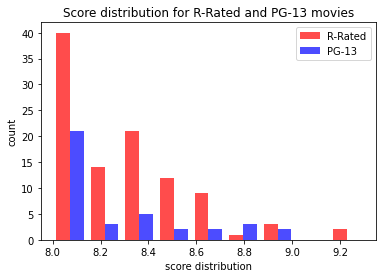

In [ ]:
"""Q2: 
Using numpy and pyplot, make a side-by-side histogram that shows the score distribution(x-axis) vs. count(y-axis)
of R-Rated movies and PG-13 ones.
Describe your plot.

Save your plot in a variable called plt2, and your dataframes in variables called df_R and df_PG13
"""

import matplotlib.pyplot as plt2


# filter df on 'content_rating' as 'R', then stores the new DataFrame in df_R

df_R = df[df['content_rating'] == 'R']

# creates a imdb_score series for df_R

series_R = df_R['imdb_score']

# filter df on 'content_rating' as 'PG-13', then stores the new DataFrame in df_PG-13

df_PG13 = df[df['content_rating'] == 'PG-13']

# creates a imdb_score series for df_PG13

series_PG13 = df_PG13['imdb_score']


# call plt2 to plot a histogram of the 2 series define above

plt2.hist([series_R, series_PG13], alpha=0.7, color=['red', 'blue'], label=['R-Rated', 'PG-13'], bins='auto')

plt2.xlabel('score distribution')

plt2.ylabel('count')

plt2.legend(loc='best')

plt2.title('Score distribution for R-Rated and PG-13 movies')

plt2.show()